In [3]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=37401734e1fdf10514bb14ac646f134b801be0bcdcbc0c6c866f04c164925fa4
  Stored in directory: c:\users\st antonys\appdata\local\pip\cache\wheels\d6\a5\f5\78d1aacafab120a99614ca8c044d485691a11bbc1e99c3c1a3
Successfully built mglearn


ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Users\St Antonys\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "C:\Users\St Antonys\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\St Antonys\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Users\St Antonys\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\St Antonys\Anaconda3\lib

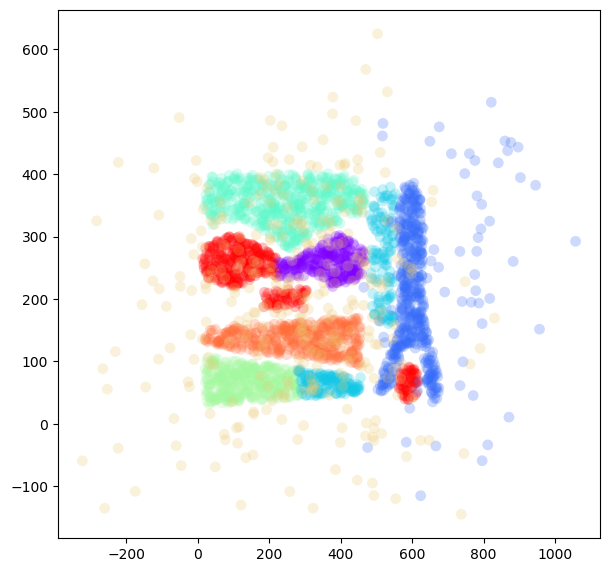

In [5]:
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import mglearn
%matplotlib inline

#read the csv file
complex_data = pd.read_csv('Complex8_N15.csv')
#complex_data.describe()


#set the kmeans
kmeans = KMeans(8)
kmeans.fit_predict(complex_data)

#copying complex data into another element
clusters = complex_data.copy()
clusters['cluster_pred'] = kmeans.fit_predict(complex_data)

#plotting 
fig,ax = plt.subplots(figsize=(7, 7), dpi=100) 
plt.scatter(clusters['V1'],clusters['V2'],c=clusters['cluster_pred'],cmap='rainbow',  alpha=0.25, s=60, linewidths=0)
plt.show();

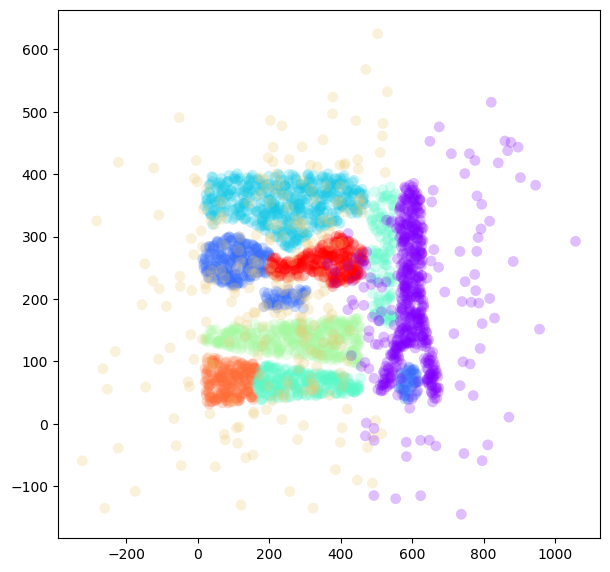

In [6]:
#Agglomerative clustering with proper parameters 
agg = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
assignment = agg.fit_predict(clusters)

# plotting
fig,ax = plt.subplots(figsize=(7, 7), dpi=100) 
ax.scatter(clusters.iloc[:,1], clusters.iloc[:,2], c=agg.labels_, cmap='rainbow',alpha=0.25, s=60, linewidths=0);

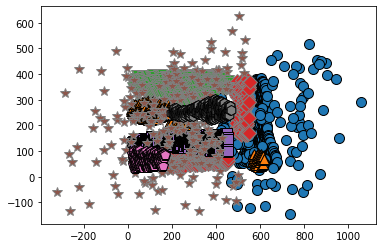

In [7]:
mglearn.discrete_scatter(clusters.iloc[:,1], clusters.iloc[:,2], assignment);

Cluster memberships:
[-1 -1 -1 ... -1 -1 -1]
min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


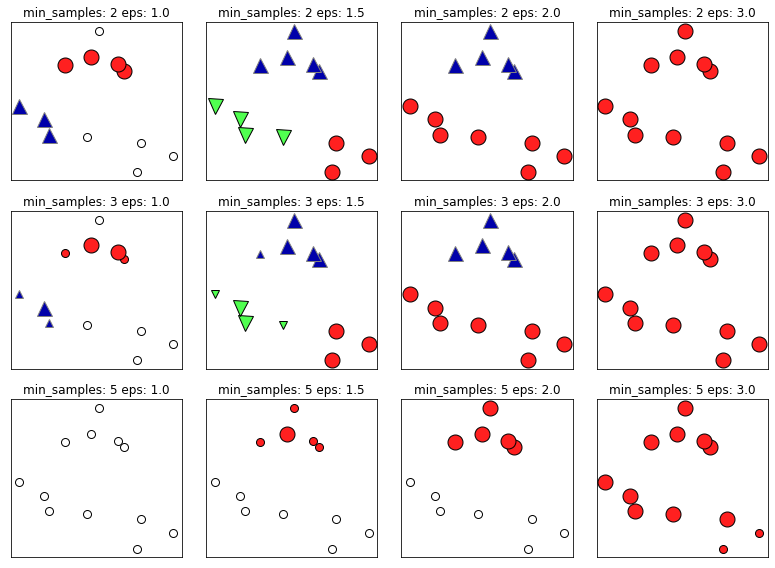

In [8]:
#DBSCAN with proper parameters to predict clusters 
dbscan = DBSCAN()
clf= dbscan.fit_predict(clusters)
print("Cluster memberships:\n{}".format(clf))

mglearn.plots.plot_dbscan()

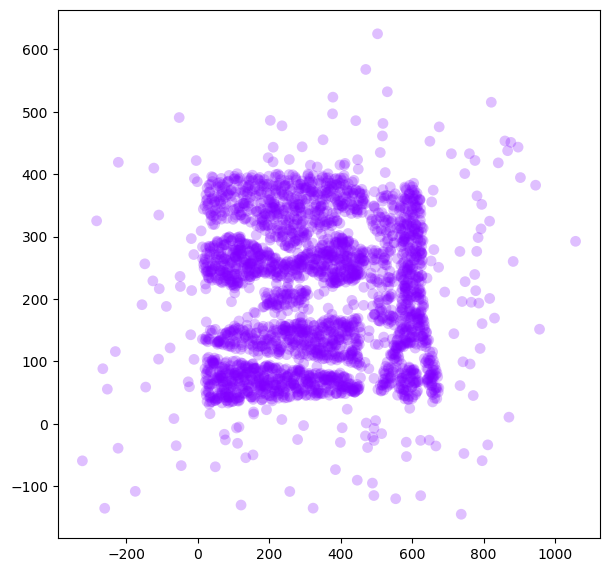

In [9]:
# plot the cluster assignments
fig,ax = plt.subplots(figsize=(7, 7), dpi=100)
ax.scatter(clusters.iloc[:, 1], clusters.iloc[:, 2], c=clf, cmap='rainbow',alpha=0.25, s=60, linewidths=0);